# Homework 2 Submission
## Yonadav Shavit

In [48]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(Let's define some latex commands)
 
$\newcommand{\floor}[1]{\left \lfloor #1 \right \rfloor}$
$\newcommand{\clamp}[1]{\left [ #1 \right ]}$
$\newcommand{\lap}[1]{Lap\left ( #1 \right )}$
$\newcommand{\lapcdf}[2]{LapCDF\left ( #1, [-\inf, #2] \right )}$
$\newcommand{\lappdf}[2]{LapPDF\left ( #1, |_{#2} \right )}$
$\newcommand{\lapcdffull}[2]{\frac{1}{2} + \frac{1}{2}sgn\left({#2}\right)\left ( 1 - \exp{\left ( - \frac{|#2|}{#1} \right ) }\right )}$
$\newcommand{\lappdffull}[2]{\frac{1}{2 #1} \exp{\left ( - \frac{#2}{#1}\right ) }}$

## Problem 1

## i. $M(x) = \clamp{\overline{x} + Z}_0^1$ where $Z \sim \lap{\frac{2}{n}}$ 
### a. 
This mechanism meets the definition of perfect DP for $\epsilon = \frac{1}{2}$. To see why, note that the global sensitivity of the mean $GS = \frac{1}{n}$.
For the range $0 < y < 1$, $ \bar x + \lap{\frac{2}{n}}$ is just the Laplace mechanism with $\epsilon = \frac{1}{2}$ (because $\frac{GS}{\epsilon} = \frac{2}{n}$ implies $\epsilon = \frac{1}{2}$), so the DP property obviously holds in that range.
For $y = 0$, we simply argue that since the DP property applies to sets of results and the Laplace mechanism satisfies DP. The probability of a result of $M(X) = 0$ is equivalent to the set of all results $ x\bar + \lap{\frac{2}{n}} < 0$, and the query "is the response in this set" must also be differentially private.
The same reasoning holds for $y = 1$. 

### c. 
A mechanism with custom $\epsilon$ and bounds $[a, b]$ would be:
$$ M(x) = \clamp{\overline{x} + Z}_a^b ~~~\text{where}~~~ Z \sim \lap{\frac{1}{\epsilon n}}$$

## ii.  $M(x) = \bar x + \clamp{Z}_{-1}^1$ where $Z \sim \lap{\frac{2}{n}}$ 

### a + b.
This mechanism does not satisfy DP, because for two neighboring datasets $X$ and $X'$, their means will be different, and since the range of $Z$ is clamped, that implies that each will have some probability of yielding a value that has $0$ probability for its neighbor.

However, we can still calculate the minimal $\delta$ for a given $n$. Let's assume that $\epsilon = \frac{1}{2}$, meaning that when $-1<Z<1$, the mechanism is simply the Laplace mechanism, and so there will be no "violations" of $\epsilon$-DP to contribute to $\delta$.
Thus, the only region that might contribute is the tails, specifically one tail (since we calculate $\delta^*$ by looking only at regions where the probability of a value for $X$ exceeds $e^{\epsilon}$ times the probability for its neighbor, and not the reverse). 

Let's assume that $X'$ is a neighbor of $X$ where one $0$ is flipped to a $1$. Then, to find the regions where $X$ is more probable, we need only look in two places. First, at the range $[ \bar X - 1, \bar X - 1 +\frac{1}{n})$, since this is the  is the region at which $X$ is nonzero but $X'$ is zero.
For all other regions, we know the mechanism is DP from previous gaurantees - except at the point that all of $M(X)$'s upper mass is concentrated at, $\bar X + 1$, where $M(X)$ has a spike of probability.

The total excess probability in this spike is:

$$ \delta_{spike} = 1 - \lapcdf{\frac{2}{n}}{1} - \lappdf{\frac{2}{n}}{1-\frac{1}{n}}= $$
$$ = 1 - \left ( \lapcdffull{\frac{2}{n}}{1} \right )  - \lappdffull{\frac{2}{n}}{1-\frac{1}{n}}$$

$$ = \frac{1}{2}\exp{\left ( -\frac{n}{2} \right ) } - \frac{n}{4} \exp{\left ( - \frac{n-1}{2}\right ) }$$
$$ = \left (\frac{1}{2} - \frac{n\sqrt{e}}{4} \right )\exp{\left ( -\frac{n}{2} \right ) }$$

We can also calculate the probability in the region in which $X$ has nonzero probability but $X'$ does not:

$$\delta_{region} = \lapcdf{\frac{2}{n}}{-1}$$
$$= \lapcdffull{\frac{2}{n}}{-1}$$

$$ = \frac{1}{2}\exp{\left(-\frac{1}{2}\right)}$$

Thus, our final minimal $\delta$ is
$$\delta^* = \delta_{spike} + \delta_{region} $$ 
$$ = \frac{1}{2}\exp{\left(-\frac{1}{2}\right)} + \left (\frac{1}{2} - \frac{n\sqrt{e}}{4} \right )\exp{\left ( -\frac{n}{2} \right ) }$$

### c.
A better mechanism, preserving $(\epsilon, \delta)$-DP and accepting values in the range of $[a, b]$, would be:
$$ M(x) = \bar X + \clamp{Z}^b_a ~~~\text{where}~~~ Z \sim \lap{\frac{b-a}{\epsilon n}}$$
In this case, there is still a $\delta > 0$ ; to get rid of that, revert to the mechanism recommended in (i). 

## iii.
### a. 
This mechanism is definitely not $(\epsilon, 0)$-DP. Consider the dataset of all zeros, and its neighbor in which a single element is flipped to a 1. If you ever see a $1$, you know with absolute certainty that the dataset is not all zeros.

### b.
We can compute an appropriate $\delta$ as follows.
Assume we have privacy loss parameter $\epsilon$, and a dataset of size $n$. Further, assume that $X$ is our dataset, and $X$ is the same dataset with a single 1 flipped to 0. (The violation will be equivalent for all datasets.)
We know that our response will violate $\epsilon$-DP only when $M(X) = 1$, since $P(M(X) = 0) < P(M(\bar X) = 0)$.
Thus, we can calculate $\delta$ as:

$$ \delta^* = \max_x{\left(\bar x - e^{\epsilon}\left(\bar x - \frac{1}{n} \right )\right )} $$
$$ = \max_x{\left(\bar x (1 - e^{\epsilon}) + \frac{e^\epsilon}{n}\right )} $$

This term is maximized when $X$ is the dataset of all $0$s (because $1 - e^\epsilon$ is always negative), such that

$$ \delta^* = \frac{e^\epsilon}{n}$$
Note that this is really bad - randomly returning an element of the dataset yields $\delta = \frac{1}{n}$, and this is always greater than that.

### c.
If you really want a mechanism like this, you can return $1$ with probability $\clamp{\bar x + Z}_0^1$, where $Z \sim \lap{\frac{b-a}{\epsilon n}}$, and $0$ otherwise.

## iv.
### a.
This mechanism is $(\frac{1}{10}, 0)$-DP. To see why, notice that the mechanism happens to be equivalent to a Laplace mechanism with $\epsilon = \frac{1}{10}$, except that whenever the range is outside $[0, 1]$, the value is discarded. (Thus the values within this range are proportionally scaled up.)

The fact that these outside values are "discarded" is also done in a DP way, since whether $M(x)$ falls into these tails is just a set of outcomes, and the Laplace mechanism guarantees DP w.r.t. the result being in these sets.

### c.
The only change is that the numerator should be $\frac{1}{\epsilon}$ instead of $10$, and the values should be zeroed outside the range of $[a, b]$. (The integral bounds should be adjusted accordingly.)

### d.
I think the best mechanism is the final mechanism, i.e. the exponential mechanism, because it returns values that are within the expected range, and also normalized so that you don't get a spike at $a$ and $b$.

## Problem 2

### (a)

In [49]:
def poisson_pdf(k):
    return 10**k*np.exp(-10)/factorial(k)

poisson_cdf_table = [poisson_pdf(0)] # seed it with the 0-th element
def poisson_cdf(k):
    k_computed = len(poisson_cdf_table) - 1
    if k <= k_computed:
        return poisson_cdf_table[k]
    else:
        sum_so_far = poisson_cdf_table[-1]
        for i in range(k_computed + 1, k + 1):
            pdf_i = poisson_pdf(i)
            sum_so_far += pdf_i
            poisson_cdf_table.append(sum_so_far)
        return sum_so_far

def poisson_inv_cdf(v):
    # value between 0 and 1, to be converted into a probability
    assert v <= 1 and v > 0
    while v > poisson_cdf_table[-1]:
        poisson_cdf(len(poisson_cdf_table) + 100) # calculate a hundred more elements
    else:
        for k, cdf_k in enumerate(poisson_cdf_table):
            if v < cdf_k:
                return k

def poisson_samples(n):
    samples = [poisson_inv_cdf(np.random.rand()) for i in range(n)]
    return np.asarray(samples)

### (b)

We'll implement the Laplace mechanism over a clamped range [a, b]

In [190]:
def lap_mechanism(epsilon, GS_q, size=None):
    return np.random.laplace(scale=GS_q/epsilon, size=size)

def dp_mean(x, epsilon, b, a=0):
    x_clipped = np.clip(x, a, b)
    GS_q = np.abs(b-a)/x.shape[0]
    return x_clipped.mean() + lap_mechanism(epsilon, GS_q)

### (c)

In [191]:
n = 200
eps = .5
b_range = range(10, 30)
trials = 100
estimation_errors = np.zeros(shape=len(b_range))
for trial in tqdm_notebook(range(trials)):
    x = poisson_samples(n)
    true_mean = x.mean()
    estimated_means = np.array([dp_mean(x, eps, b) for b in b_range])
    estimation_errors += (estimated_means - true_mean)**2
estimation_errors = estimation_errors/trials

Text(0.5, 1.0, 'MSE in reported mean as a function of clipping size b')

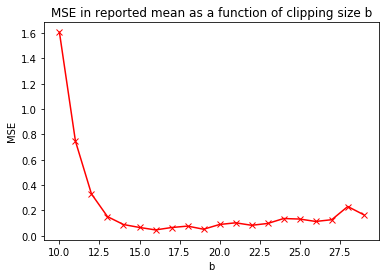

In [192]:
plt.plot(b_range, estimation_errors, 'r-x')
plt.xlabel("b")
plt.ylabel("MSE")
plt.title("MSE in reported mean as a function of clipping size b")

From our experiment, we can see that the optimal b value to minimize mean squared error $b^* = 17$ for this example.

### (d)

Individual values in the dataset may significantly affect our above procedure. If a particular value is an outlier, the smaller $b$ is, the more that value gets clipped. (In fact, the impact of the size of the clipping induced by $b$ is quadratic because we're looking at squared error.) So that value would influence the choice of $b$ across any bootstrap subset of the data in which it was included, and an adversary could use the fact that the final $b$ was higher than might have been otherwise expected from the rest of the population to extract that that individual was likely in the dataset.

### (e)

One alternative method is to simply use domain expertise about the likely range of values to set a reasonable $b$ (without looking at the data). So long as this is done independent of the practitioner's knowledge of the data itself, this is differentially private.

Alternatively, if we could compute a differentially private maximum (perhaps via an exponential mechanism), then we could set that as $b$. It might in practice be far from $b^*$, but it will still be narrower than "infinity". (Similarly, we could pick the 9/10ths largest value in a DP way using the exponential mechanism in more or less the same way that we find the median, but weighted.)

## Problem 3

### (a)

In [244]:
def regression(x, y):
    Sxy = np.sum((x-x.mean())*(y-y.mean()))
    Sxx = np.sum((x-x.mean())*(y-y.mean()))
    beta = Sxy/Sxx
    alpha = np.mean(y - beta*x)
    return alpha, beta
    
def dp_regression(x, y, eps, xmin, xmax, ymin, ymax, eps_beta_fraction=0.5):
    x = np.clip(x, xmin, xmax)
    y = np.clip(y, ymin, ymax)
    
    Sxy = np.sum((x-x.mean())*(y-y.mean()))
    Sxx = np.sum((x-x.mean())*(y-y.mean()))
    true_beta = Sxy/Sxx # TODO: remove
    # add Laplace noise
    corner_values = [xmin*ymin, xmin*ymax, xmax*ymin, xmax*ymax]
    GS_Sxy = max(corner_values) - min(corner_values)
    GS_Sxy = (ymax-ymin)*(xmax-xmin)
    GS_Sxx = (xmax-xmin)**2
    
    eps_beta = eps*eps_beta_fraction
    Sxy += lap_mechanism(eps_beta/2, GS_Sxy)
    Sxx += lap_mechanism(eps_beta/2, GS_Sxx)
    beta = Sxy/Sxx
    
    # now do DP mean release 
    eps_alpha = eps - eps_beta
    if beta > 0:
        a = ymin - xmin*beta
        b = ymax - xmax*beta
    else:
        a = ymax - xmax*beta
        b = ymin - xmin*beta
    alpha = dp_mean(y - beta*x, eps_alpha, a=a, b=b)
#     print("beta: {:0.2f}, true_beta: {:0.2f}, mean_miss: {:0.2f}, true_mean_miss: {:0.2f}".format(
#         beta,
#         true_beta,
#         np.mean(y-beta*x),
#         np.mean(y-true_beta*x)))
    
    return alpha, beta

def regression_samples(n, alpha=1, beta=1, sigma=1.):
    x = poisson_samples(n)
    y = beta*x + alpha + np.random.normal(scale=sigma, size=x.shape[0])
    return x, y

def regression_mse(x, y, alpha, beta):
    return np.mean((y - (alpha + beta*x))**2)

### (b)

In [249]:
trials = 100
n = 1000
eps = 1
# we'll pick our upper bound based on the likely range of values
# specifically, 99.9% of values fall within this range
# (we aren't using the specific individuals in our sample - 
# only known properties of the distribution)
xmax = poisson_inv_cdf(0.999)
# more arbitrarily, if we assume the magnitude of the slope is less than 10 from prior knowledge
guessed_max_slope = 10
ymin = -guessed_max_slope*xmax
ymax = guessed_max_slope*xmax

np_mses = []
dp_mses = []
for trial in tqdm_notebook(range(trials)):
    x, y = regression_samples(n)
    alpha_np, beta_np = regression(x, y)
    alpha_dp, beta_dp = dp_regression(x, y, eps, xmin=0, xmax=xmax, ymin=ymin, ymax=ymax)
    np_mses.append(regression_mse(x, y, alpha_np, beta_np))
    dp_mses.append(regression_mse(x, y, alpha_dp, beta_dp))

Text(0.5, 1.0, 'Example regression')

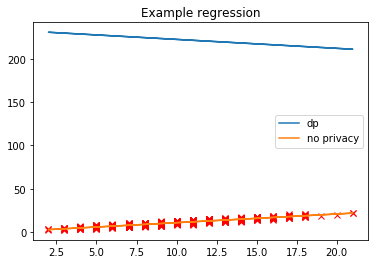

In [253]:
plt.plot(x, y, 'rx')
plt.plot(x, x*beta_dp + alpha_dp, label="dp")
plt.plot(x, x*beta_np + alpha_np, label="no privacy")
plt.legend()
plt.title("Example regression")

In [255]:
print("Average MSE across trials, with DP: {:0.2f}, w/o DP: {:0.2f}".format(np.mean(dp_mses), np.mean(np_mses)))

Average MSE across trials, with DP: 22364.53, w/o DP: 1.00


Clearly, DP substantially degrades utility.

Text(0, 0.5, 'frequency')

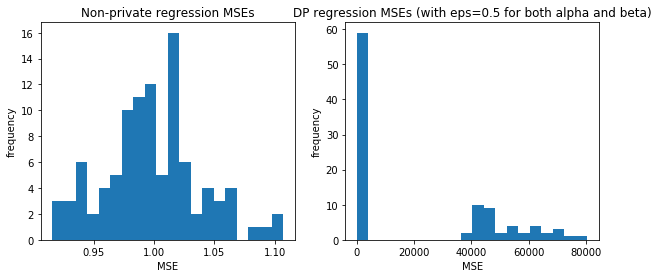

In [257]:
def ignore_outliers(z, max_dev=3.5):
    z = np.array(z)
    outlier_inds = np.abs(z - z.mean()) > np.std(z)*max_dev
    return z[np.logical_not(outlier_inds)]
    
bins = 20
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))
plt.sca(axs[0])
plt.hist(ignore_outliers(np_mses), bins=bins);
plt.title("Non-private regression MSEs")
plt.xlabel("MSE")
plt.ylabel("frequency")
plt.sca(axs[1])
plt.hist(ignore_outliers(dp_mses), 
         histtype='barstacked',
         bins=bins);
plt.title("DP regression MSEs (with eps=0.5 for both alpha and beta)")
plt.xlabel("MSE")
plt.ylabel("frequency")

The distribution of residuals is much much higher when doing differentially private regression. After interrogating this for a while, the problem seems to be as follows:

When we spend an insufficient portion of our $\epsilon$ on estimating the slope, the estimate of the slope is off - which then makes the estimate of the intercept way, way off. Once the intercept is much larger or smaller than 1, almost every point will miss by that amount. This leads to enormous squared errors for nearly every point.


### (c)

Let's see whether we can't find a better allocation of epsilons.

In [273]:
trials = 200
eps_beta_fraction_range = np.linspace(.1, .9, 100)
avg_dp_mses = []
for eps_beta_fraction in tqdm_notebook(eps_beta_fraction_range):
    dp_mses = []
    for trial in range(trials):
        x, y = regression_samples(n)
        alpha_np, beta_np = regression(x, y)
        alpha_dp, beta_dp = dp_regression(x, y, eps, xmin=0, xmax=xmax, ymin=ymin, ymax=ymax,
                                          eps_beta_fraction=eps_beta_fraction)
        np_mses.append(regression_mse(x, y, alpha_np, beta_np))
        dp_mses.append(regression_mse(x, y, alpha_dp, beta_dp))
    avg_dp_mses.append(np.mean(dp_mses))

Best eps fraction: 0.86


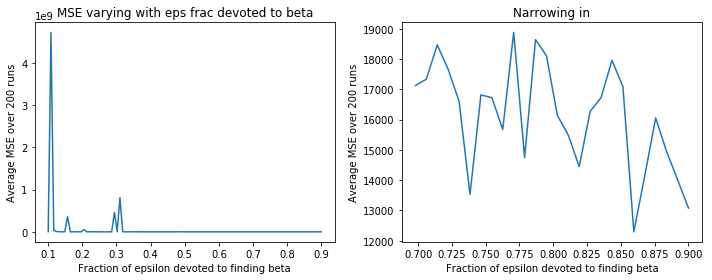

In [286]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(eps_beta_fraction_range, avg_dp_mses);
plt.title("MSE varying with eps frac devoted to beta")
plt.xlabel("Fraction of epsilon devoted to finding beta")
plt.ylabel("Average MSE over {} runs".format(trials))
best_eps_fraction = eps_beta_fraction_range[np.argmin(avg_dp_mses)]
plt.subplot(1, 2, 2)
range_top = np.argmin(avg_dp_mses) + 20
range_bottom = np.argmin(avg_dp_mses) - 20
plt.plot(eps_beta_fraction_range[range_bottom:range_top],
         avg_dp_mses[range_bottom:range_top]);
plt.title("Narrowing in")
plt.xlabel("Fraction of epsilon devoted to finding beta")
plt.ylabel("Average MSE over {} runs".format(trials))
plt.tight_layout()
print("Best eps fraction: {:0.2f}".format(best_eps_fraction))

As we expected we can see that it's much better to devote more of the epsilon to finding an accurate slope (optimally around $0.85$) - 
with the idea being that any error in the slope quickly translates to a greater error in the intercept.
Hence, we want to allocate epsilon to minimize this double-counting of error.

One sidenote: even the optimized version of this performs very, very poorly, and that's even after assuming that our slopes exist in a fairly narrow range ($\pm 10$).

## Problem 4.

Let's write out the problem.
$$ E[\#\{ i \in [n] : A(M(X))_i = X_i\}/n]$$
$$ = \frac{1}{n} \sum_{i=1}^n E[A(M(X))_i == X_i] $$
by linearity of expectation. Let's focus on a single such example $i$.

Let $X^{(i)}$ be the dataset identical to $X$, except that row $i$ is replaced with value $0$. Obviously, all such datasets are neighbors of $X$ (or the same as $X$), and so DP properties should hold (if they're the same, the ineqality holds because the equality holds).

Assume that, for a set of outputs $s \in S$, if $M(X) = s$ our adversary guesses that $A(s)_i = X_i$.
$$ E[A(M(X))_i == X_i] = P(M(X) \in S) \leq e^\epsilon P(M(X^{(i)} \in S) + \delta$$
$$P(M(X^{(i)}) \in S) = E[A(M(X^{(i)})) = X^{(i)}_i] = 1-p$$
because there's only a $1-p$ probability that $X_i$ happened to be 0.

Thus, we have that
$$ E[\#\{ i \in [n] : A(M(X))_i = X_i\}/n]$$
$$ = \frac{1}{n} \sum_{i=1}^n E[A(M(X))_i == X_i] $$
$$ \leq \frac{1}{n} \sum_{i=1}^n \left ( e^\epsilon (1-p) + \delta \right ) $$
$$ = e^\epsilon (1-p) + \delta $$
This seems to complete one half of the desired $\max{\left \{ p, 1-p\right \}}$, but repeating this procedure twice would suggest the bound is the min of these two bounds - which suggests to me that I've erred somewhere in this derivation.
But I'm not sure where, and have run out of time :(

## Problem 5
Emailed separately.